In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [1]:
deca_data=pd.read_csv('Deca_Games.csv')

NameError: name 'pd' is not defined

In [3]:
print(deca_data.shape)

(20, 13)


In [4]:
deca_data.head()

,Unified ID,Unified Name,Unified Publisher,App ID,App Name,Publisher ID,Publisher Name,Number of Countries,Price,Last Update Date,Release Date,Last Month Downloads,Last Month Revenue
0,55c50a3e02ac64f9c000228c,Dead Trigger 2 FPS Zombie Game,Deca Games EOOD,720063540,DEAD TRIGGER 2: Zombie Games,1472223668,Deca Games EOOD,100,0.0,2023-12-22 00:00:00 UTC,2013-10-23 00:00:00 UTC,80000,30000
1,53785264830f782dbe00097d,Dead Trigger: Survival Shooter,Deca Games EOOD,533079551,DEAD TRIGGER: Survival Shooter,1472223668,Deca Games EOOD,99,0.0,2023-11-03 00:00:00 UTC,2012-06-28 00:00:00 UTC,40000,5000
2,5a04eeca0211a60473466631,Shadowgun Legends: Online FPS,Deca Games EOOD,1091251242,Shadowgun Legends: Online FPS,1472223668,Deca Games EOOD,99,0.0,2023-12-11 00:00:00 UTC,2018-03-21 00:00:00 UTC,30000,10000
3,55b4c8de02ac644443000013,UNKILLED - FPS Zombie Games,Deca Games EOOD,969488951,UNKILLED - 第一人称在线僵尸射击游戏,1472223668,Deca Games EOOD,99,0.0,2023-11-03 00:00:00 UTC,2015-09-02 00:00:00 UTC,8000,10000
4,58cb08430211a6114f001043,Almost a Hero — Idle RPG,Deca Games EOOD,1116630619,Almost a Hero - Idle Adventure,1472223668,Deca Games EOOD,101,0.0,2023-10-30 00:00:00 UTC,2017-03-15 00:00:00 UTC,1000,1000


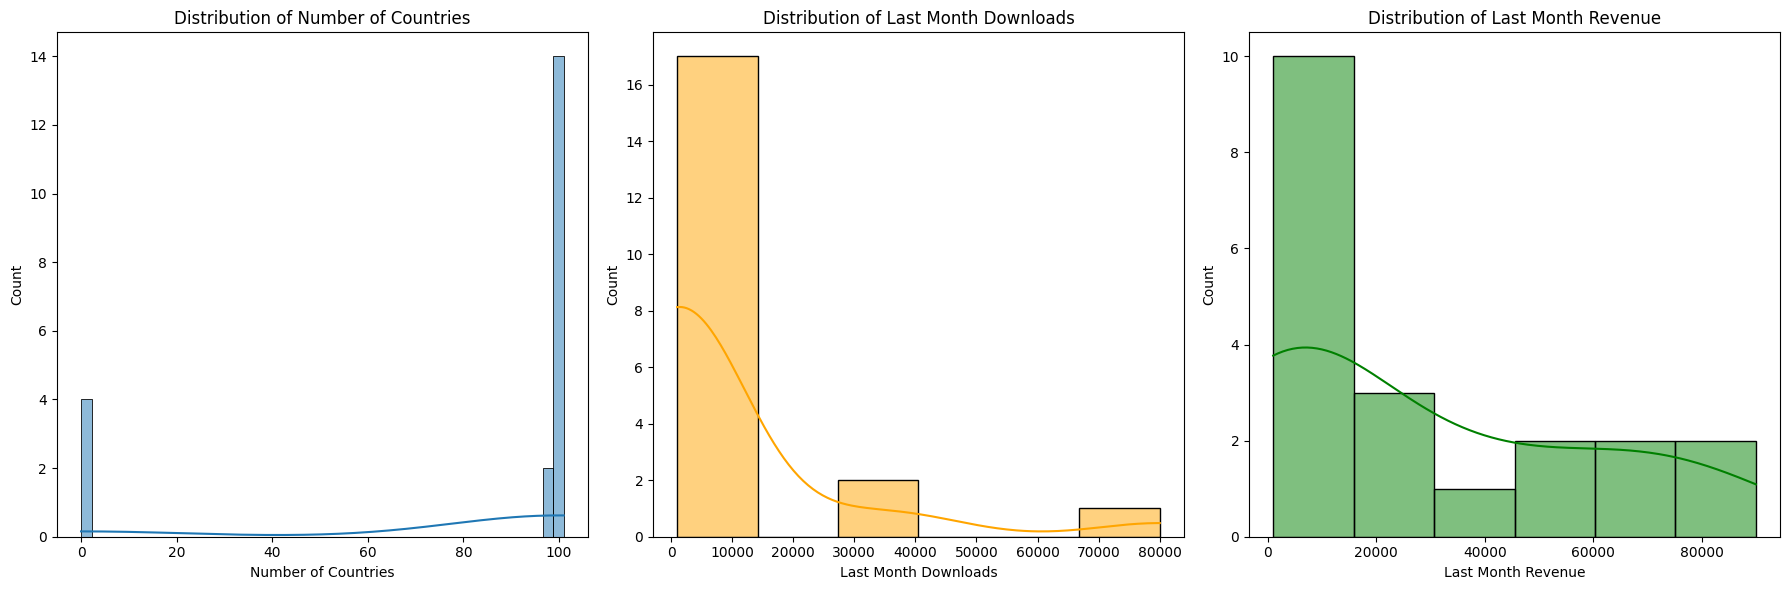

In [5]:
# Visualization of "Number of Countries", "Last Month Downloads", and "Last Month Revenue"

plt.figure(figsize=(18, 6))

# Plot for "Number of Countries"
plt.subplot(1, 3, 1)
sns.histplot(deca_data['Number of Countries'], kde=True)
plt.title('Distribution of Number of Countries')

# Plot for "Last Month Downloads"
plt.subplot(1, 3, 2)
sns.histplot(deca_data['Last Month Downloads'], kde=True, color='orange')
plt.title('Distribution of Last Month Downloads')

# Plot for "Last Month Revenue"
plt.subplot(1, 3, 3)
sns.histplot(deca_data['Last Month Revenue'], kde=True, color='green')
plt.title('Distribution of Last Month Revenue')

plt.tight_layout()
plt.show()


 ### <u>**1.Histogram of Number of Countries**</u>
 **Distribution Shape**: The distribution is skewed towards the lower end showing that the majority of apps are available in fewer countries, and there are relatively fewer apps that are available in a much larger number of countries.
 
**Spread**: 
There is a relatively narrow spread in the data, with a few outliers representing apps available in a very high number of countries, much more than the majority of the apps in the dataset

**_Insights_**:

* **Market Reach**: The visualizations above show that Deca Games apps are available in a limited number of countries indicating a focused market strategy.This suggests that the company targets specific regions or markets when making their apps available, rather than distributing them globally.


### <u>**2.Histogram of Last Month Downloads**</u>

**Distribution Type**: The histogram is right-skewed, which means most apps have a relatively low number of downloads, with a few apps having their downloads being extremely high.

**Spread**: There is a wide spread in the number of downloads, indicating significant variability in app popularity. This suggests that while some apps have very high download numbers, which indicates high popularity, many others have fewer downloads in comparison.

**_Insights_**:

* **Popularity**:The right-skewed nature of the histogram suggests a competitive gaming app market. In such a market, only a few apps manage to have very high download numbers. This skewness implies that while there are some apps that are extremely popular and get a large number of downloads, the majority of apps have fewer downloads in contrast. This shows that in the gaming market, a small number of apps dominate in terms of appealing to the users.

* **Market Saturation and Opportunities**: As there is concentration of many apps in the lower download range this likely suggests general market saturation in certain game app categories making it harder for some Deca Games apps to push through in terms of downloads.However, this also shows that there are potential opportunities in less crowded segments within the market. By identifying and targeting these less saturated areas there might be growth in the number of downloads.
  
### <u>**3.Histogram of Last Month Revenue**</u>
**Distribution Type**: Similar to downloads, the revenue histogram is also right-skewed, indicating that most apps earn less, while a small number earn a lot more.

**Spread**: There's a noticeable concentration of apps in the lower revenue bracket.

**Comparison with Downloads**: The similarity in the shape of the revenue and downloads histograms suggests a correlation between downloads and revenue. However, not all high-download apps necessarily translate into high revenue, ie Dead Trigger 2 FPS Zombie Game has the same revenue as Elves vs. Dwarves ($30000), though the former has 80000 downloads compared to the latter's 1000.

**_Insights_**:

* **Revenue Potential**: A few apps bring in the high revenue though the skew in the revenue distribution indicates that there is potential for high earnings.
* **Conversion Rates**: The correlation between downloads and revenue suggests that high downloads are an important factor but they don't solely determine high revenue. I believe that looking into effective monetization strategies might help in this regard.

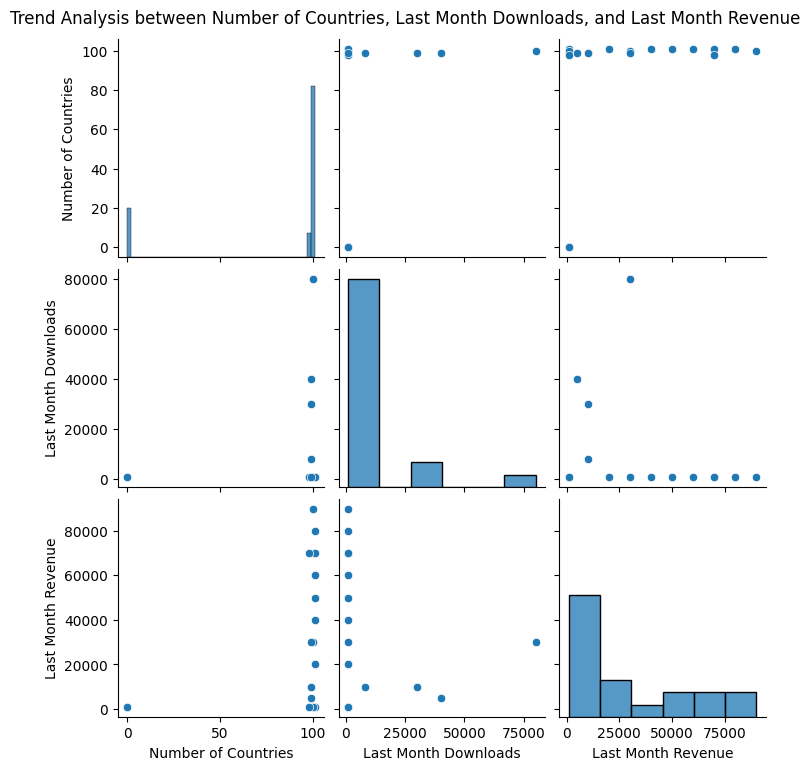

In [6]:
# Selecting the relevant columns for trend analysis
trend_data = deca_data[["Number of Countries", "Last Month Downloads", "Last Month Revenue"]]

# Pairplot to visualize the relationships between the three columns
sns.pairplot(trend_data)
plt.suptitle("Trend Analysis between Number of Countries, Last Month Downloads, and Last Month Revenue", y=1.02)
plt.show()

<u>**Observations**</u>

1.There is definitely a  positive relationship between the (**Last Month Downloads vs Last Month Revenue**). This is expected as higher downloads often lead to higher revenue.

2.There isn't a linear relationship between the (**Number of Countries vs Last Month Downloads**) as well as (**Number of Countries vs Last Month Revenue**)

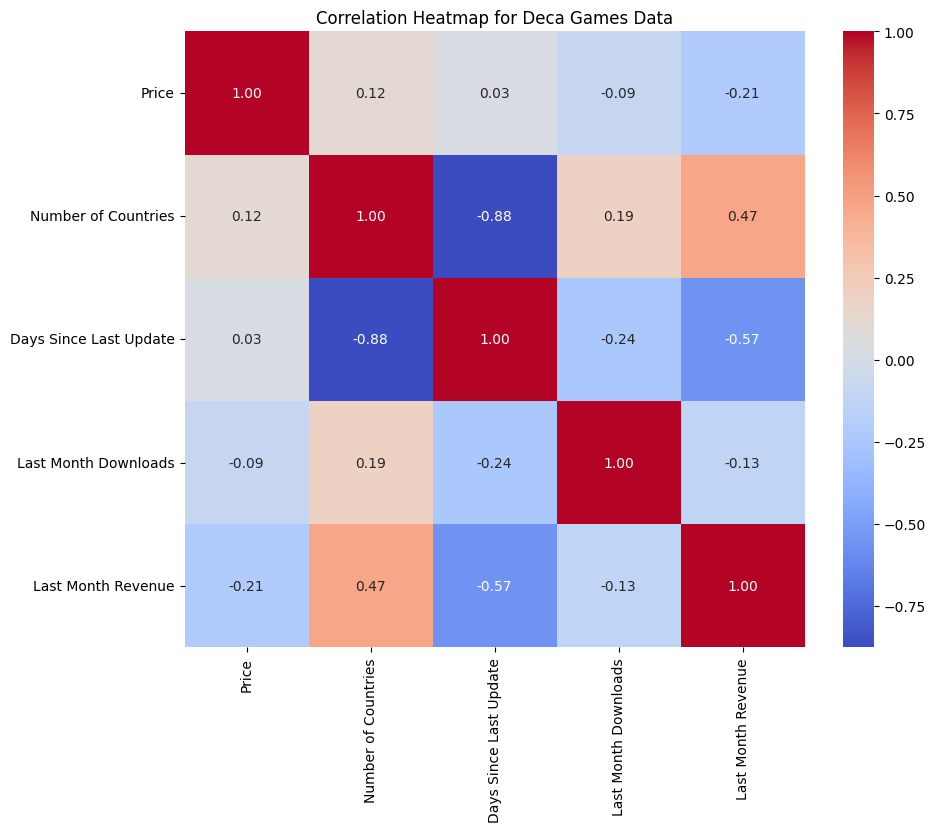

In [7]:
# Correlation Heatmap

# Convert "Last Update Date" to datetime format and calculate "Days Since Last Update"
deca_data['Last Update Date'] = pd.to_datetime(deca_data['Last Update Date'])
max_date_deca = deca_data['Last Update Date'].max()
deca_data['Days Since Last Update'] = (max_date_deca - deca_data['Last Update Date']).dt.days

# Selecting columns for the correlation heatmap
columns_for_heatmap = ['Price', 'Number of Countries', 'Days Since Last Update', 'Last Month Downloads', 'Last Month Revenue']
correlation_data_heatmap_deca = deca_data[columns_for_heatmap]

# Calculate the correlation matrix for these columns
correlation_matrix_heatmap_deca = correlation_data_heatmap_deca.corr()

# Displaying the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_heatmap_deca, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Deca Games Data")
plt.show()


<u> **Insights**</u>:

**Price**:
There's a slight negative correlation between Price and both Last Month Downloads (-0.09) and Last Month Revenue (-0.21). This suggests higher prices might slightly discourage downloads and revenue.

**Number of Countries**:
There's a moderate positive correlation between the Number of Countries and Last Month Revenue (0.466), indicating that apps available in more countries tend to have higher revenue. A weaker positive correlation is observed between the Number of Countries and Last Month Downloads (0.195).

**Days Since Last Update**:
A strong negative correlation is present between Days Since Last Update and both Last Month Downloads (-0.24) and Last Month Revenue (-0.57). This highlights the importance of frequent updates in maintaining or increasing app popularity and revenue.

**Downloads vs. Revenue**:
There's a slight negative correlation between Last Month Downloads and Last Month Revenue (-0.13). This suggests that high download numbers don't always translate into high revenue.

**Key Takeaways**:

* Marketing to more countries can be beneficial for increasing revenue.
* Regular updates seem crucial for both attracting more downloads and generating higher revenue.
* High downloads alone don't guarantee high revenue.Monetization strategies also play a huge role.

## <u>**PREDICTIVE MODELLING**</u>

In [8]:
# Preparing the data for the predictive model
X = deca_data[['Price', 'Number of Countries', 'Days Since Last Update', 'Last Month Downloads']]
y = deca_data['Last Month Revenue']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the linear regression model
revenue_model = LinearRegression()

# Training the model
revenue_model.fit(X_train, y_train)

# Making predictions
y_pred = revenue_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(2751564275.8181567, -5.979237224649732)

**Interpretation**:

The MSE is quite high, meaning that the model's predictions are, on average, very far way from the actual revenue values.
The negative R² value shows that the model is not a good fit for the data. A negative R² implies that the model performs worse than a simple horizontal line.

 **_Trying out 2 different models: Random Forest and Gradient Boosting_** 

In [9]:
# Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Gradient Boosting Model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

(mse_rf, r2_rf), (mse_gb, r2_gb)


((95508133.04988667, 0.757747284591283),
 (441799057.38630116, -0.12060635988915958))

**Interpretation**:

The **Random Forest model** shows a significant improvement over the linear model. It has a much lower MSE and a positive R² value of 0.758, indicating that it explains about 75.8% of the variance in the revenue data. This suggests that the relationship between the predictors and revenue is better captured by this more complex, non-linear model.

The Gradient Boosting model has a negative R² value making it not a good choice for a model.

Based on these results, we shall proceed with the Random Forest

**_Setting up the parameter grid of the Random Forest Model for hyperparameter tuning_**

In [10]:

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]        # Method of selecting samples for training each tree
}

# Create a base model for tuning
rf_base = RandomForestRegressor(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
best_params


Fitting 3 folds for each of 216 candidates, totalling 648 fits


{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

**_Creating,training, making predictions and evaluating the optimized Random Forest model with the best parameters_**

In [11]:

optimized_rf_model = RandomForestRegressor(
    bootstrap=True,
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=300,
    verbose=0,
    random_state=42
)

optimized_rf_model.fit(X_train, y_train)

# Making predictions with the optimized model
y_pred_optimized_rf = optimized_rf_model.predict(X_test)

# Evaluating the optimized model
mse_optimized_rf = mean_squared_error(y_test, y_pred_optimized_rf)
r2_optimized_rf = r2_score(y_test, y_pred_optimized_rf)

print("MSE:", mse_optimized_rf)
print("R2 Score:", r2_optimized_rf)


MSE: 147687809.3953579
R2 Score: 0.6253955373611721


**Interpretation**:

MSE (Mean Squared Error): This value is significantly lower than the initial Random Forest model, indicating that the optimized model's predictions are, on average, closer to the actual revenue figures. A lower MSE is a good indicator of a better model.

R² Score: The R² value of 0.6254 means that approximately 62.54% of the variance in the "Last Month Revenue" is explained by the model. This is a big improvement from the initial Random Forest model (which had an R² of around 0.758) and definitely much better than the linear regression model.
    


**Using our Optimised Random Forest Model to try and predict the revenue of a new fictional game by Deca Games called'Underground Assassins'**


In [12]:
#Underground Assassins Features
Price=2.99
Number_of_Countries= 50 #(available in 50 countries)
Days_Since_Last_Update= 30 #(last updated 30 days ago)
Last_Month_Downloads= 10,000

app_features = np.array([[2.99, 50, 30, 10000]])

# Predicting the revenue using the optimized Random Forest model
predicted_revenue = optimized_rf_model.predict(app_features)

print("Predicted Revenue for Underground Assassins: ${:.2f}".format(predicted_revenue[0]))



Predicted Revenue for Underground Assassins: $38222.44


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, m